<a href="https://colab.research.google.com/github/aryan2107-cloud/100-Day-ML-Challenge-/blob/main/Day30_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

##Hard vs Soft Clustering

| Aspect | K-Means (Hard) | GMM (Soft) |
|--------|----------------|------------|
| Assignment | Each point → 1 cluster | Probability for each cluster |
| Output | Labels: [0, 1, 2, ...] | Probabilities: [0.7, 0.2, 0.1] |
| Cluster shape | Spherical | Elliptical (any covariance) |
| Uncertainty | None | Built-in |

In [2]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/geyser.csv"

In [3]:
df = pd.read_csv(url)

from sklearn.datasets import load_iris

data = {
    'duration': [3.6, 1.8, 3.333, 2.283, 4.533, 2.883, 4.7, 3.6, 1.95, 4.35,
                     1.833, 3.917, 4.2, 1.75, 4.7, 2.167, 1.75, 4.8, 1.6, 4.25],
    'waiting': [79, 54, 74, 62, 85, 55, 88, 85, 51, 85,
                    54, 84, 78, 47, 83, 52, 62, 84, 52, 79]
}

df = pd.DataFrame(data)
df.head()

,duration,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [4]:
df.describe().round(2)

,duration,waiting
count,20.00,20.00
mean,3.20,69.65
std,1.20,14.87
min,1.60,47.00
25%,1.92,54.00
50%,3.47,76.00
75%,4.28,84.00
max,4.80,88.00


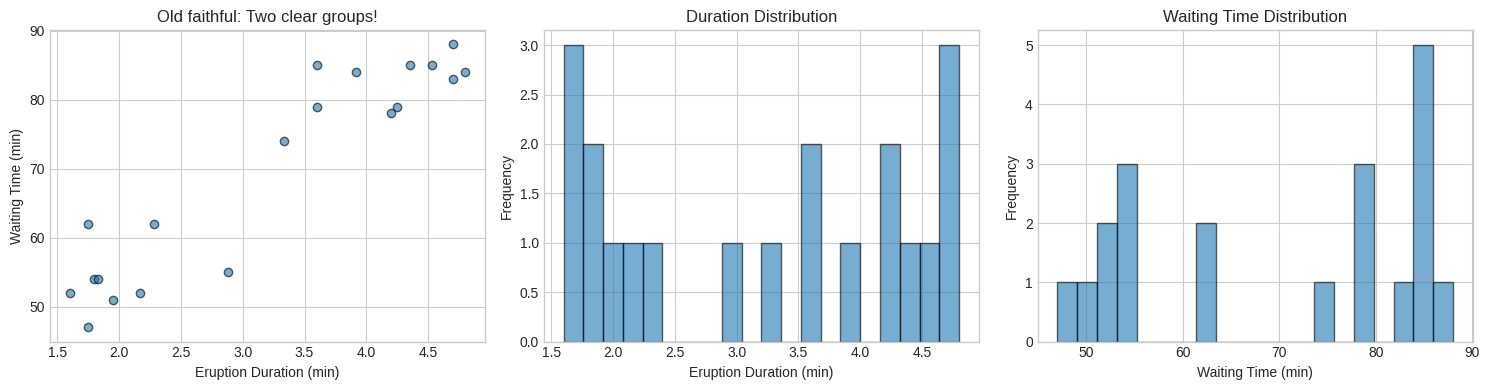

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(df['duration'], df['waiting'], alpha=0.6, edgecolor='black')
axes[0].set_xlabel('Eruption Duration (min)')
axes[0].set_ylabel('Waiting Time (min)')
axes[0].set_title('Old faithful: Two clear groups!')

axes[1].hist(df['duration'], bins=20, alpha=0.6, edgecolor='black')
axes[1].set_xlabel('Eruption Duration (min)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Duration Distribution')

axes[2].hist(df['waiting'], bins=20, alpha=0.6, edgecolor='black')
axes[2].set_xlabel('Waiting Time (min)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Waiting Time Distribution')

plt.tight_layout()
plt.show()

In [6]:
#Preparing the data
x = df[['duration', 'waiting']].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print(f"Data shape: {x.shape}")

Data shape: (20, 2)


Fit GMM

In [7]:
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(x_scaled)

labels = gmm.predict(x_scaled)
probs = gmm.predict_proba(x_scaled)

print(f"Labels: {labels}")
print(f"Probabilities: {probs}")
print(f"\nCluster sizes: {np.bincount(labels)}")

Labels: [0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0]
Probabilities: [[9.99999993e-01 7.21452213e-09]
 [7.33863323e-12 1.00000000e+00]
 [9.99973232e-01 2.67682329e-05]
 [5.81110857e-06 9.99994189e-01]
 [1.00000000e+00 1.15963676e-16]
 [1.94031911e-10 1.00000000e+00]
 [1.00000000e+00 5.09382373e-19]
 [1.00000000e+00 4.02336878e-11]
 [3.54967618e-14 1.00000000e+00]
 [1.00000000e+00 1.50648138e-15]
 [7.50164761e-12 1.00000000e+00]
 [1.00000000e+00 1.34432956e-12]
 [1.00000000e+00 2.72084776e-11]
 [1.73564724e-17 1.00000000e+00]
 [1.00000000e+00 1.08566296e-16]
 [2.38138454e-13 1.00000000e+00]
 [8.18208416e-07 9.99999182e-01]
 [1.00000000e+00 8.30906411e-18]
 [2.35648335e-13 1.00000000e+00]
 [1.00000000e+00 4.30547028e-12]]

Cluster sizes: [11  9]


In [8]:
print("GMM Parameters:")
print("="*50)

print("\nMeans (scaled):")
print(gmm.means_.round(3))

print("\nMeans (original scale):")
means_original = scaler.inverse_transform(gmm.means_)
print(f"  Cluster 0: Duration={means_original[0, 0]:.2f} min, Waiting={means_original[0, 1]:.1f} min")
print(f"  Cluster 1: Duration={means_original[1, 0]:.2f} min, Waiting={means_original[1, 1]:.1f} min")

print("\nWeights (mixing proportions):")
print(f"  Cluster 0: {gmm.weights_[0]:.1%}")
print(f"  Cluster 1: {gmm.weights_[1]:.1%}")

GMM Parameters:

Means (scaled):
[[ 0.839  0.865]
 [-1.026 -1.057]]

Means (original scale):
  Cluster 0: Duration=4.18 min, Waiting=82.2 min
  Cluster 1: Duration=2.00 min, Waiting=54.3 min

Weights (mixing proportions):
  Cluster 0: 55.0%
  Cluster 1: 45.0%


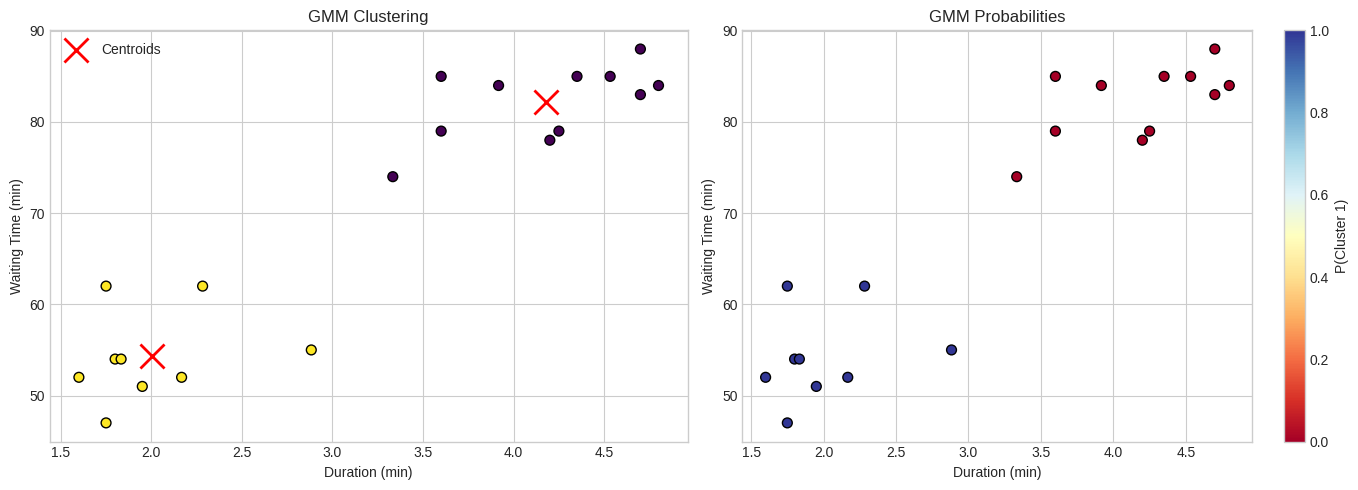

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', edgecolor='black', s=50)
axes[0].scatter(means_original[:, 0], means_original[:, 1], c='red', marker='x',
                s=300, edgecolor='black', linewidth=2, label='Centroids')
axes[0].set_xlabel('Duration (min)')
axes[0].set_ylabel('Waiting Time (min)')
axes[0].set_title('GMM Clustering')
axes[0].legend()

scatter = axes[1].scatter(x[:, 0], x[:, 1], c=probs[:, 1], cmap='RdYlBu', edgecolor='black', s=50)

axes[1].set_xlabel('Duration (min)')
axes[1].set_ylabel('Waiting Time (min)')
axes[1].set_title('GMM Probabilities')
plt.colorbar(scatter, ax=axes[1], label='P(Cluster 1)')

plt.tight_layout()
plt.show()

Visualizing the Gaussian Contours

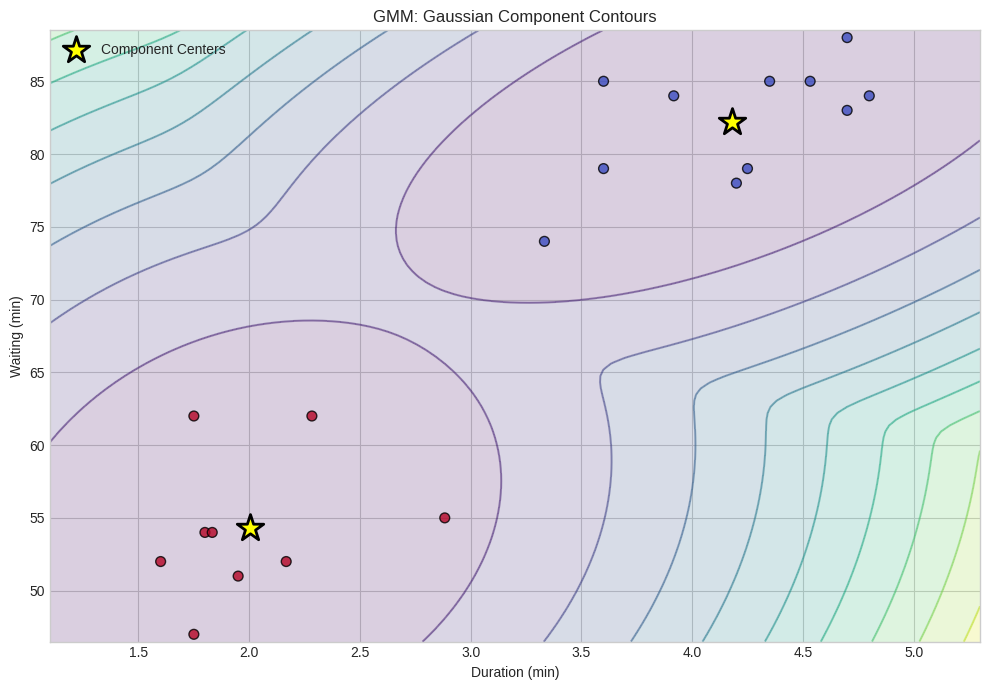

In [10]:
# Plot Gaussian contours
def plot_gmm_contours(gmm, X_data, ax, scaler=None):
    """Plot GMM component contours."""
    # Create grid
    x_min, x_max = X_data[:, 0].min() - 0.5, X_data[:, 0].max() + 0.5
    y_min, y_max = X_data[:, 1].min() - 0.5, X_data[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Get density
    grid = np.c_[xx.ravel(), yy.ravel()]
    if scaler:
        grid_scaled = scaler.transform(grid)
        Z = -gmm.score_samples(grid_scaled)
    else:
        Z = -gmm.score_samples(grid)
    Z = Z.reshape(xx.shape)

    # Plot contours
    ax.contour(xx, yy, Z, levels=10, cmap='viridis', alpha=0.5)
    ax.contourf(xx, yy, Z, levels=10, cmap='viridis', alpha=0.2)

fig, ax = plt.subplots(figsize=(10, 7))

# Plot contours
plot_gmm_contours(gmm, x, ax, scaler)

# Plot points
ax.scatter(x[:, 0], x[:, 1], c=labels, cmap='coolwarm', edgecolor='black', s=50, alpha=0.8)

ax.scatter(means_original[:, 0], means_original[:, 1], c='yellow', marker='*',
           s=400, edgecolor='black', linewidths=2, label='Component Centers')

ax.set_xlabel('Duration (min)')
ax.set_ylabel('Waiting (min)')
ax.set_title('GMM: Gaussian Component Contours')
ax.legend()
plt.tight_layout()
plt.show()

Covariance Type

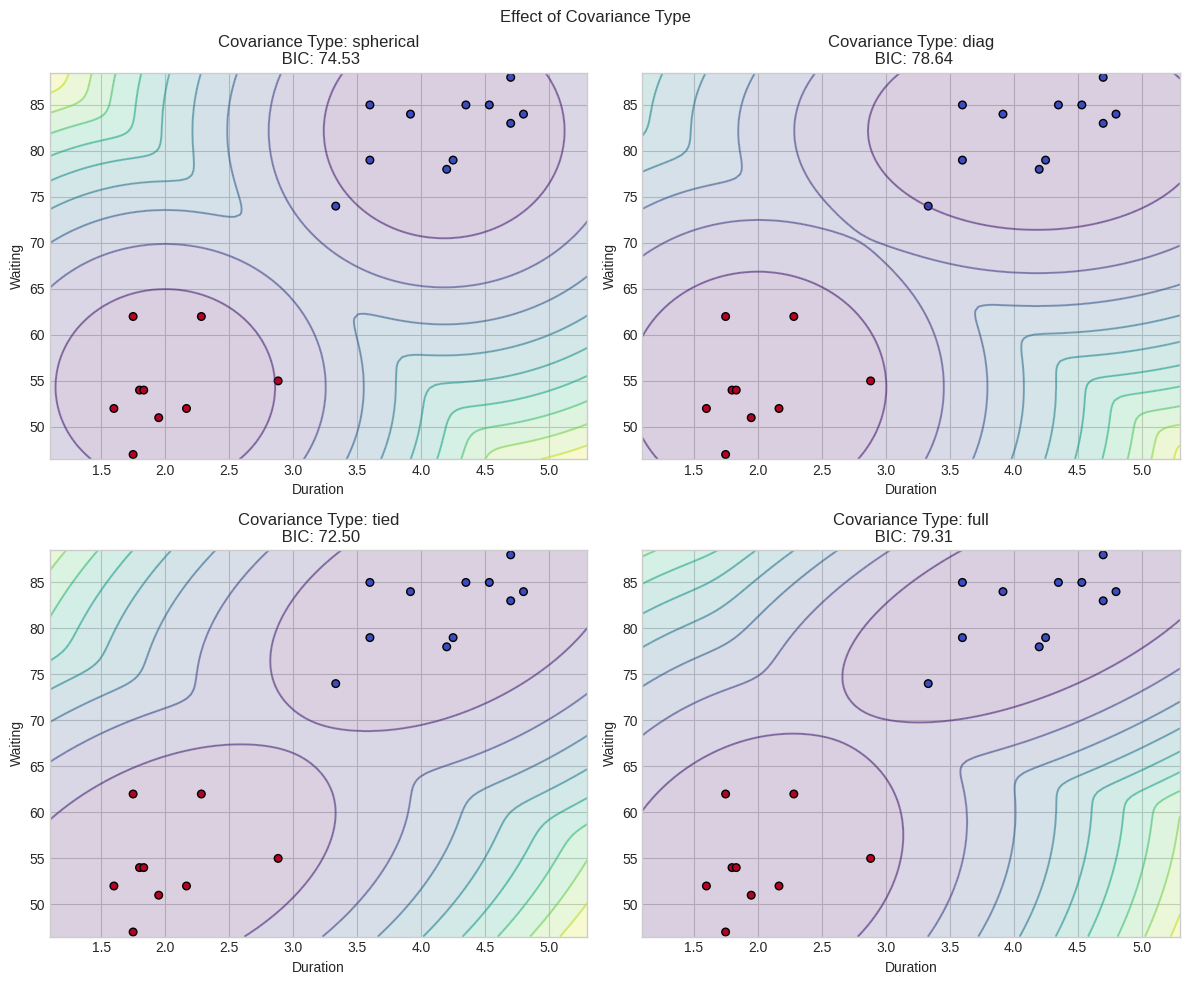

In [11]:
cov_types = ['spherical', 'diag', 'tied', 'full']

fig, axes = plt.subplots(2, 2, figsize = (12, 10))
axes = axes.flatten()

for ax, cov_type in zip(axes, cov_types):
  gmm_temp  = GaussianMixture(n_components=2, covariance_type=cov_type, random_state=42)
  gmm_temp.fit(x_scaled)
  labels_temp = gmm_temp.predict(x_scaled)

  #plot
  plot_gmm_contours(gmm_temp, x, ax, scaler)
  ax.scatter(x[:, 0], x[:, 1], c=labels_temp, cmap='coolwarm', edgecolor='black', s=30)
  ax.set_xlabel('Duration')
  ax.set_ylabel('Waiting')
  ax.set_title(f"Covariance Type: {cov_type}\n BIC: {gmm_temp.bic(x_scaled):.2f}")

plt.suptitle('Effect of Covariance Type')
plt.tight_layout()
plt.show()



In [12]:
print("Covariance Types:")
print("  spherical: Same variance in all directions (circles)")
print("  diag: Different variance per dimension (axis-aligned ellipses)")
print("  tied: All components share same covariance")
print("  full: Each component has its own full covariance (any ellipse)")

Covariance Types:
  spherical: Same variance in all directions (circles)
  diag: Different variance per dimension (axis-aligned ellipses)
  tied: All components share same covariance
  full: Each component has its own full covariance (any ellipse)


Model Selection (BIC & AIC)

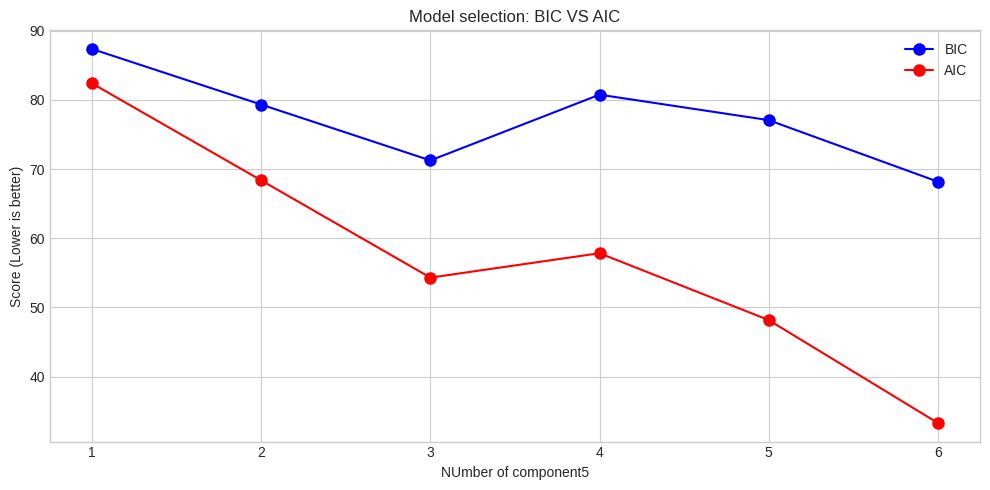

In [16]:
# BIC (Bayesian Information Criterion) - lower is better
# AIC (Akaike Information Criterion) - lower is better

n_components_range = range(1, 7)
bic_scores = []
aic_scores = []

for n in n_components_range:
  gmm_temp = GaussianMixture(n_components=n, random_state=42)
  gmm_temp.fit(x_scaled)
  bic_scores.append(gmm_temp.bic(x_scaled))
  aic_scores.append(gmm_temp.aic(x_scaled))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(n_components_range, bic_scores, 'b-o', label='BIC', markersize=8)
ax.plot(n_components_range, aic_scores, 'r-o', label='AIC', markersize=8)
ax.set_xlabel("NUmber of component5")
ax.set_ylabel("Score (Lower is better)")
ax.set_title("Model selection: BIC VS AIC")
ax.legend()
ax.set_xticks(n_components_range)
plt.tight_layout()
plt.show()

In [22]:
#Comparing covariance types with BIC
results = []

for cov_type in cov_types:
  for n in range(1, 5):
    gmm_temp = GaussianMixture(n_components=n, covariance_type=cov_type, random_state=42)
    gmm_temp.fit(x_scaled)
    results.append({
        'n_components': n,
        'covariance_type': cov_type,
        'bic': gmm_temp.bic(x_scaled),
        'aic': gmm_temp.aic(x_scaled)
    })

results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['bic'].idxmin()]

print("Best Model by BIC: ")
print(f" Components: {int(best_model['n_components'])}")
print(f"Covariance Type: {best_model['covariance_type']}")
print(f"BIC: {best_model['bic']:.2f}")

Best Model by BIC: 
 Components: 3
Covariance Type: diag
BIC: 68.85


GMM VS K-Means

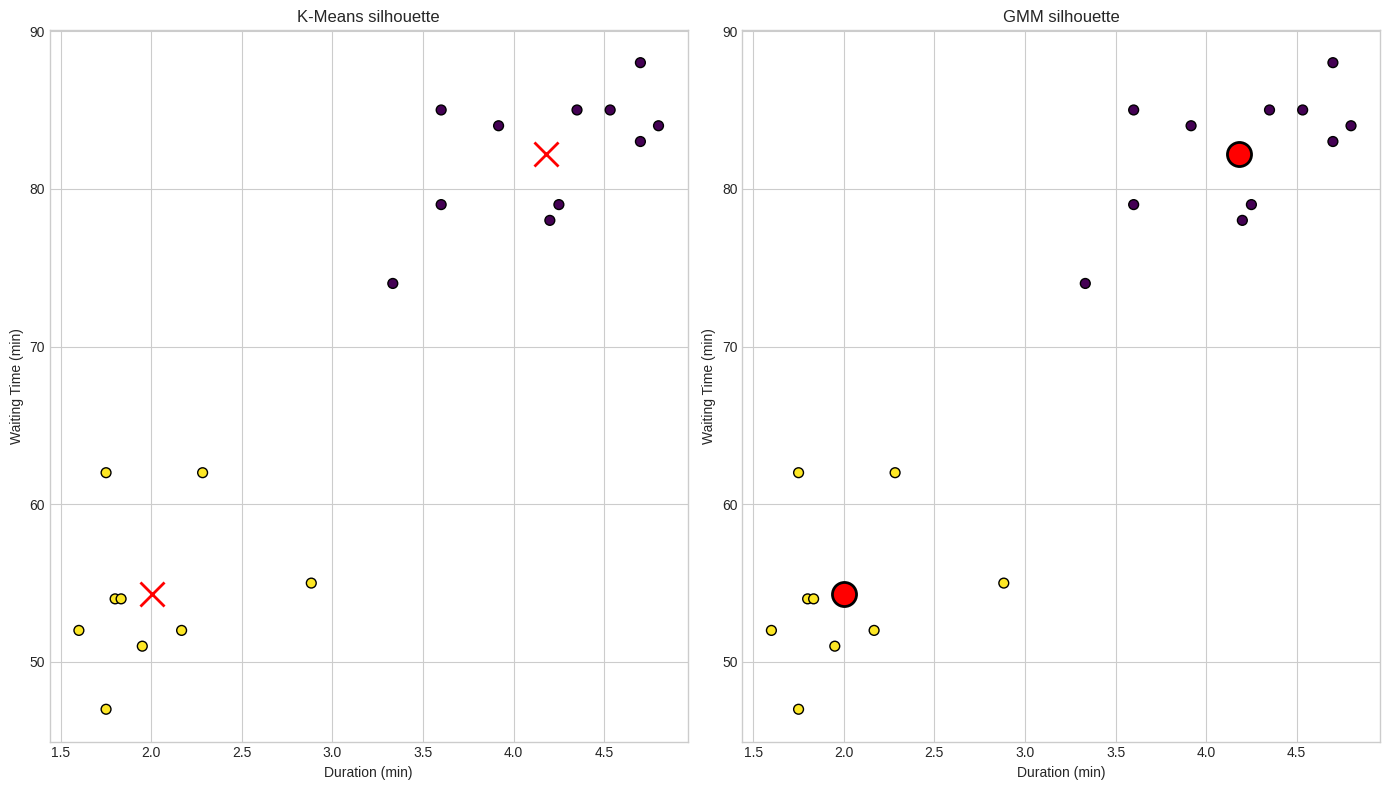

In [23]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(x_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

#K-Means
axes[0].scatter(x[:, 0], x[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='black', s=50)
kmeans_centers = scaler.inverse_transform(kmeans.cluster_centers_)
axes[0].scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='red', marker='x',
                s=300, edgecolor='black', linewidths=2)
axes[0].set_xlabel('Duration (min)')
axes[0].set_ylabel('Waiting Time (min)')
axes[0].set_title("K-Means silhouette")

#GMM
axes[1].scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', edgecolor='black', s=50)
axes[1].scatter(means_original[:, 0], means_original[:, 1], c='red', s=300, edgecolor='black', linewidths=2)
axes[1].set_xlabel('Duration (min)')
axes[1].set_ylabel('Waiting Time (min)')
axes[1].set_title("GMM silhouette")

plt.tight_layout()
plt.show()

GMM For Density Estimation

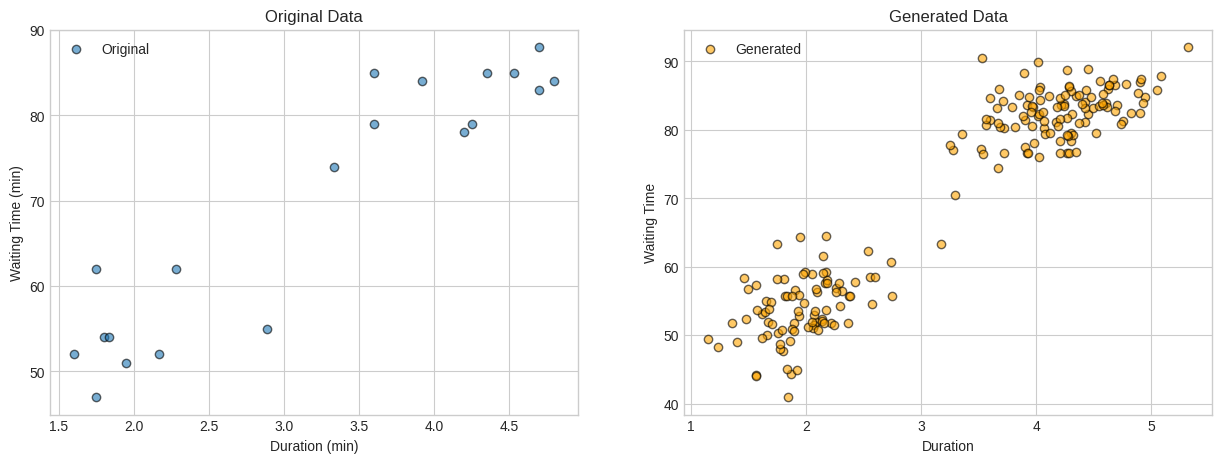

In [26]:
#it can estimate the probability density function
# It can generate new samples from the learned distribution

#Sample from GMM
x_new, y_new = gmm.sample(200)
x_new_original = scaler.inverse_transform(x_new)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#orignal data
axes[0].scatter(x[:, 0], x[:, 1], alpha=0.6, edgecolor='black', label='Original')
axes[0].set_xlabel('Duration (min)')
axes[0].set_ylabel('Waiting Time (min)')
axes[0].set_title('Original Data')
axes[0].legend()

#new data
axes[1].scatter(x_new_original[:, 0], x_new_original[:, 1], alpha=0.6, edgecolor='black', c='orange', label='Generated')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Waiting Time')
axes[1].set_title('Generated Data')
axes[1].legend()

plt.tight_layout
plt.show()

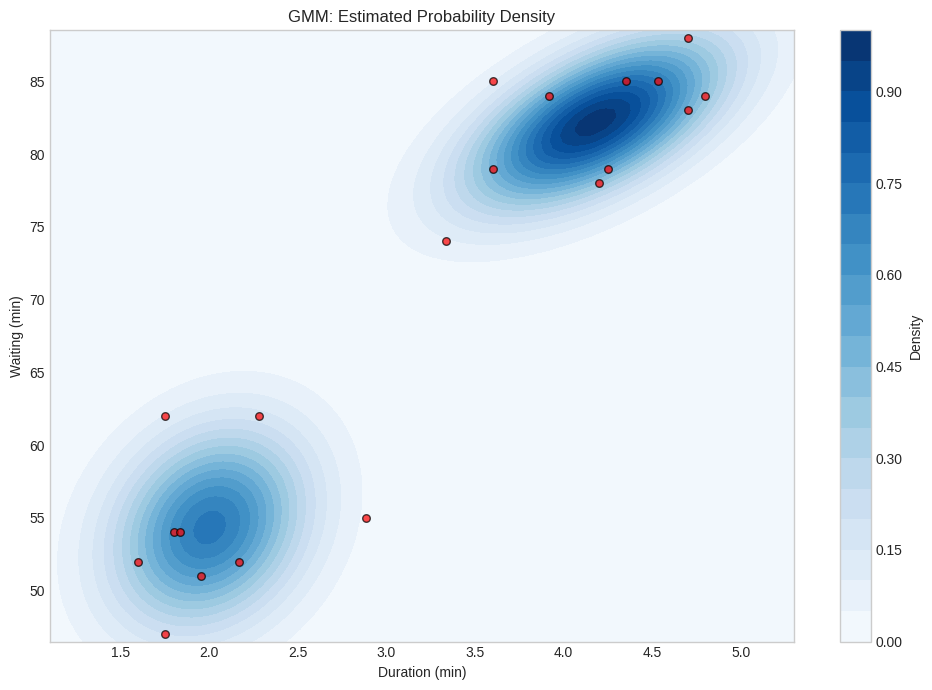

In [29]:
# Density estimation visualization
fig, ax = plt.subplots(figsize=(10, 7))

# Create grid
x_grid = np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 100)
y_grid = np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 100)
xx, yy = np.meshgrid(x_grid, y_grid)
grid = np.c_[xx.ravel(), yy.ravel()]

# Get density
grid_scaled = scaler.transform(grid)
log_density = gmm.score_samples(grid_scaled)
density = np.exp(log_density).reshape(xx.shape)

# Plot
contour = ax.contourf(xx, yy, density, levels=20, cmap='Blues')
ax.scatter(x[:, 0], x[:, 1], c='red', edgecolor='black', s=30, alpha=0.7)
plt.colorbar(contour, ax=ax, label='Density')
ax.set_xlabel('Duration (min)')
ax.set_ylabel('Waiting (min)')
ax.set_title('GMM: Estimated Probability Density')
plt.tight_layout()
plt.show()

Anomaly detection with GMM

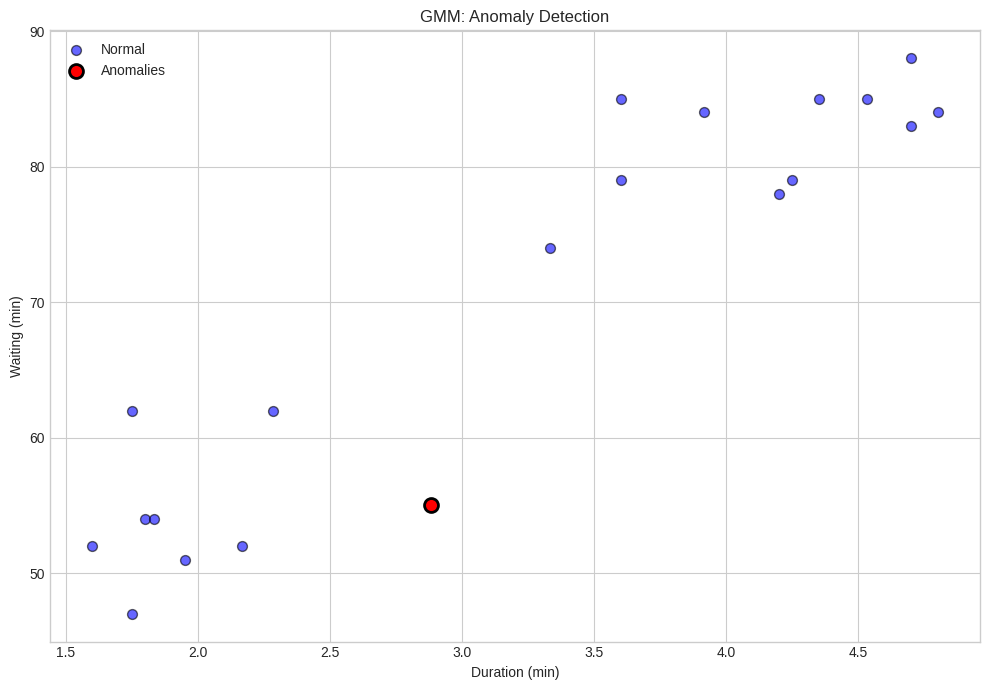

In [33]:
log_likelihood = gmm.score_samples(x_scaled)

threshold = np.percentile(log_likelihood, 5)
anomalies = log_likelihood < threshold

fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(x[~anomalies, 0], x[~anomalies, 1], c='blue', edgecolor='black', s=50, label='Normal', alpha=0.6)
ax.scatter(x[anomalies, 0], x[anomalies, 1], c='red', edgecolor='black', s=100, label='Anomalies', linewidths=2)

ax.set_xlabel('Duration (min)')
ax.set_ylabel('Waiting (min)')
ax.set_title('GMM: Anomaly Detection')
ax.legend()
plt.tight_layout()
plt.show()

## Summary

### GMM vs K-Means

| Aspect | K-Means | GMM |
|--------|---------|-----|
| Assignment | Hard (0 or 1) | Soft (probabilities) |
| Cluster shape | Spherical | Elliptical (any) |
| Output | Labels | Labels + Probabilities |
| Algorithm | Lloyd's | Expectation-Maximization |
| Density estimation | No | Yes |
| Uncertainty | No | Built-in |

### Covariance Types

| Type | Shape | Parameters |
|------|-------|------------|
| spherical | Circles | Fewest |
| diag | Axis-aligned ellipses | Medium |
| tied | Same ellipse for all | Medium |
| full | Any ellipse | Most |

### Model Selection

- **BIC:** Penalizes complexity more (prefer simpler models)
- **AIC:** Less penalty (may choose more components)
- Lower is better for both

### When to Use GMM

- Need probability of cluster membership
- Clusters are elliptical
- Want to generate new samples
- Need uncertainty estimates
- Density estimation required